# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 2
# Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

/Users/francabb/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Predicting Taxi Pickups in NYC

In this homework, we will explore k-nearest neighbor, linear and polynomial regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in files `dataset_1_train.txt` and `dataset_1_test.txt` as separate training and test sets. The first column in each file contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded during different days in Jan 2015 (randomly sampled across days and time of that day).

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pick ups at that time. The models will be fitted to the training set, and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric. 

**Data Normalization:** As a first step, we suggest that you normalize the `TimeMin` predictor to a value between 0 and 1. This can be done by dividing the time column in the training and test sets by 1440 (i.e. the maximum value the predictor can take). This normalization step would be particularly helpful while fitting polynomial regression models on this data.

# Part (0): EDA

Generate a scatter plot of the training data points, with the time of the day on the X-axis and the number of taxi pickups on the Y-axis. Does the pattern of taxi pickups make intuitive sense to you?

In [2]:
# reading the files
df_train = pd.read_csv("dataset_1_train.txt")
df_test = pd.read_csv("dataset_1_test.txt")
df_test.head()

,TimeMin,PickupCount
0,925.0,43.0
1,559.0,33.0
2,1277.0,41.0
3,1114.0,61.0
4,784.0,29.0


In [3]:
# Normalizing the TimeMin column of the training data to get values between 0 and 1
df_train["TimeMin"] = df_train["TimeMin"]/1440
df_train.head()

,TimeMin,PickupCount
0,0.597222,33.0
1,0.011806,75.0
2,0.337500,13.0
3,0.208333,5.0
4,0.267361,10.0


In [4]:
# Normalizing the TimeMin column of the testing data to get values between 0 and 1
df_test["TimeMin"] = df_test["TimeMin"]/1440
df_test.head()

,TimeMin,PickupCount
0,0.642361,43.0
1,0.388194,33.0
2,0.886806,41.0
3,0.773611,61.0
4,0.544444,29.0


In [5]:
# sorting values based on time
df_train = df_train.sort_values("TimeMin")
df_test = df_test.sort_values("TimeMin")
df_train.head()

,TimeMin,PickupCount
36,0.002778,58.0
56,0.004861,16.0
1,0.011806,75.0
239,0.013194,61.0
10,0.027778,24.0


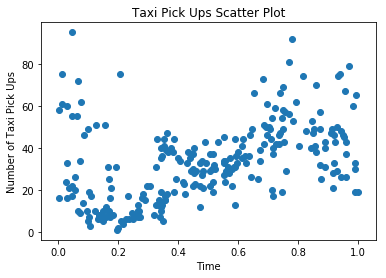

In [6]:
# scatter plot of training data points 
plt.scatter(df_train.TimeMin, df_train.PickupCount)
plt.xlabel("Time")
plt.ylabel("Number of Taxi Pick Ups")
plt.title("Taxi Pick Ups Scatter Plot");

Intuitively, the scatter plot does make sense to me because it seems as though overall, the number of taxi pick ups increases during the day and reaches a high during the evening, before decreasing in the early morning hours. This is expected as less people would need taxi very early in the morning, which is where the scatter plot seems to hit a minimum (around 4am).

# Part (a): k-Nearest Neighbors

We begin with k-Nearest Neighbors (k-NN), a non-parametric regression technique. You may use `sklearn`'s built-in functions to run k-NN regression. Create a `KNeighborsRegressor` object, use the `fit` method in the object to fit a k-NN regressor model, use the `predict` method to make predictions from the model, and the `score` method to evaluate the $R^2$ score of the model on a data set.

- Fit k-NN regression models:
    - Fit a k-NN regression model to the training set for different values of $k$ (e.g. you may try out values 1, 2, 10, 25, 50, 100 and 200). 
    - If you are using `sklearn`'s built-in functions for k-NN regression, explain what happens when you invoke the `fit` function. 
    - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
- Visualize the fitted models: 
    - Generate a scatter plot of the training data points, and in the same figure, also generate line plots of the predicted values $\hat{y}$ from each fitted model as a function of the predictor variable $x$. (*Hint:* you will want to sort the $x$ values before plotting.)
    - How does the value of $k$ effect the fitted model?
- Evaluate the fitted models:
    - Compute the $R^2$ score for the fitted models on both the training and test sets. Are some of the calculated $R^2$ values negative? If so, what does this indicate? What does a $R^2$ score of 0 mean?
    - Make plots of the training and test $R^2$ values as a function of $k$. Do the training and test $R^2$ plots exhibit different trends? Explain how the value of $k$ influences the training and test $R^2$ values.

In [7]:
# reshaping x_train and y_train in the way that sklearn understands
x_train = df_train["TimeMin"]
y_train = df_train["PickupCount"]
x_train1 = x_train.reshape((250,1))
y_train1 = y_train.reshape((250,1))
print(x_train1.shape)
print(y_train1.shape)

(250, 1)
(250, 1)


/Users/francabb/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/francabb/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [8]:
# reshaping x_test and y_test in the way that sklearn understands
x_test = df_test["TimeMin"]
y_test = df_test["PickupCount"]
x_test1 = x_test.reshape((1000,1))
y_test1 = y_test.reshape((1000,1))
print(x_test1.shape)
print(y_test1.shape)

(1000, 1)
(1000, 1)


/Users/francabb/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/Users/francabb/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


In [9]:
# using the fit method to fit the KNN regressor model
KNR = KNeighborsRegressor(n_neighbors = 25)
# fits the model using x_train1 as training data and y_train1 as target values
KNR_fit = KNR.fit(x_train1, y_train1)
KNR_fit

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=25, p=2,
          weights='uniform')

In [10]:
# predicts the target values using the test predictor values
y_pred = KNR_fit.predict(x_test1)
print("Y predicted: ")
print(str(y_pred[:5]))
print("Y actual")
print(y_test1[:5])

Y predicted: 
[[ 36.64]
 [ 36.64]
 [ 36.64]
 [ 36.64]
 [ 36.64]]
Y actual
[[ 51.]
 [ 57.]
 [ 63.]
 [ 44.]
 [ 65.]]


In [11]:
# Using the score method to evaluate model with R^2
KNR.score(x_test1, y_test1)

0.41403032612599561

If you are using sklearn's built in functions for knn regression, explain what happens when you invoke the fit function. If n is the number of observations in the training set, what can you say about a knn regression model that uses k=n? 
<br>
The fit function from sklearn will fit the model using the x values in the training set as training data and the y values in the training set as target values. 
If the k in the knn equation is set to n, the knn regression model will be close to a straight horizontal line. This is because the equation, which finds the predicted values, will average all the values of y in the training data. This would lead to all the y predicted values having the same value.

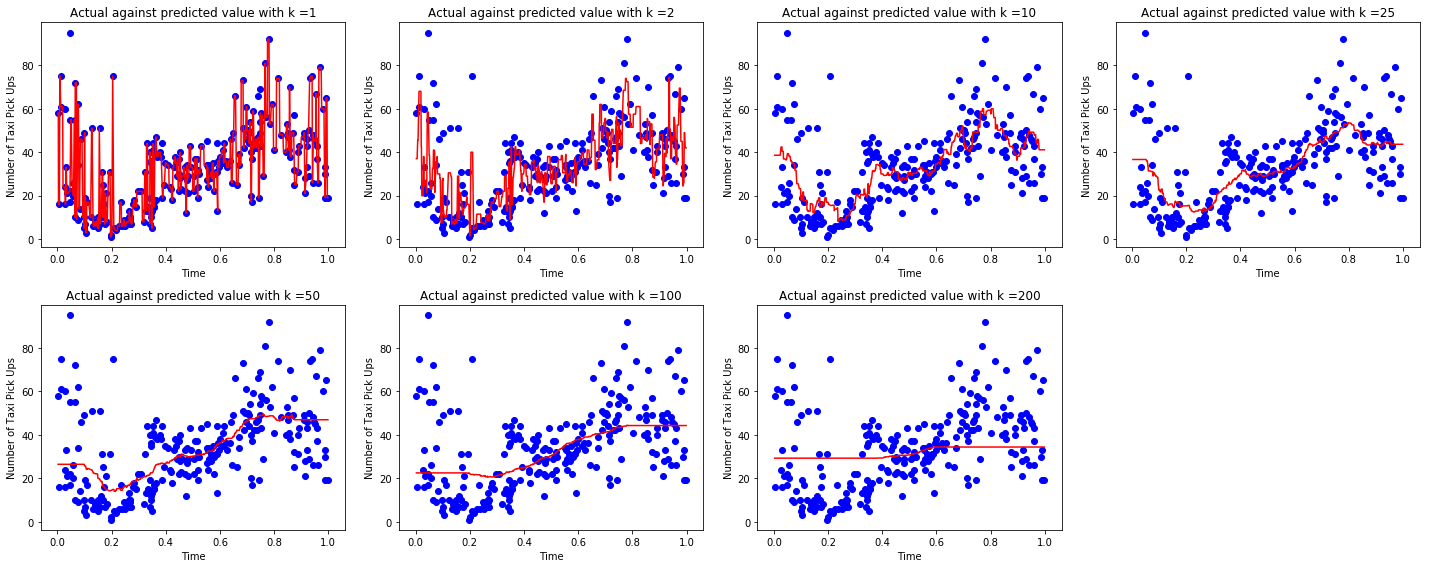

In [12]:
# potential values for k
k = [1, 2, 10, 25, 50, 100, 200]
# setting the size of each figure below
fig = plt.figure(figsize=(20, 8))
for i, k in enumerate(k):
    plt.subplot(2,4,i+1)
    # creating scatter plot of the training data
    plt.scatter(df_train.TimeMin, df_train.PickupCount, color = 'blue', label='Y_Train')
    plt.xlabel("Time")
    plt.ylabel("Number of Taxi Pick Ups")
    plt.title("Actual against predicted value with k =" + str(k));
    KNR = KNeighborsRegressor(n_neighbors = k)
    # fits the model using x_train1 as training data and y_train1 as target values
    y_pred = KNR.fit(x_train1, y_train1).predict(x_test1)
    # plotting the predicted values for the x test values
    plt.plot(x_test1, y_pred, color='red');

# makes sure that each graph is fitted correctly
fig.tight_layout()
plt.show()

How does the value of k affect the fitted model? 
<br>
With very small values of k, the line plot passes through almost all the points from the training data. For example, with k = 1, the values in the line plot are shifted by one compared to the scatter plot. Instead, as k becomes larger and closer to the n, such as k = 200, the line plot comes more and more straight, given that it is averaging all the values of the scatter plot for each time value.

In [13]:
r_sq_train = []
r_sq_test = []
k = [1, 2, 10, 25, 50, 100, 200]
for val in k: 
    # R^2 score for the fitted models on both training and test sets 
    KNR = KNeighborsRegressor(n_neighbors = val)
    # fits the model using x_train1 as training data and y_train1 as target values
    KNR.fit(x_train1, y_train1)
    # Using the r^2_score method to evaluate model with R^2
    score_train = r2_score(y_train1, KNR.fit(x_train1, y_train1).predict(x_train1))
    score_test = r2_score(y_test1, KNR.fit(x_train1, y_train1).predict(x_test1))
    r_sq_train.append(score_train)
    r_sq_test.append(score_test)

print("R_^2 for training set:")
print(r_sq_train)
print("")
print("R^2 for test set:")
print(r_sq_test)

R_^2 for training set:
[0.87897968282704175, 0.6468303480681783, 0.45097913477660767, 0.41921422595176028, 0.35433154580544879, 0.2869537997976257, 0.10857334021016818]

R^2 for test set:
[0.026793114990582345, 0.23541124628516041, 0.41540664874257371, 0.41403032612599566, 0.38050111639302864, 0.31163937860854973, 0.10946504335780693]


Are some of the calculated R^2 values negative? If so, what does this indicate? What does a R^2 score of 0 mean? 
<br>
R^2 is used to compare the chosen model with the fit of a horizontal straight line. Based on the values above, I do not have any negative values, although the R^2 for the testing set does have a very small number. If one of the R^2 would have been negative though, it would mean that my model fits worse than a horizontal straight line. It would also mean that the chosen model does not follow the trend of the data. 
<br>
An R^2 of zero means that the predictor values X do not account for any of the variation in the values of y. 

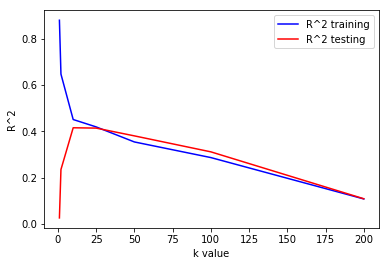

In [14]:
# plotting the training and test R^2 values as a function of k
plt.plot(k, r_sq_train, color ='blue', label='R^2 training')
plt.plot(k, r_sq_test, color ='red', label='R^2 testing')
plt.xlabel("k value")
plt.ylabel("R^2")
plt.legend(loc='best')
plt.show()

Do the training and test R^2 plots exhibit different trends? Explain how the value of k influences the training and test R^2 values.
<br> 
The training and test R^2 plots do exhibit different trends at fist. K=1 would mean that the model we have created matches perfectly the training data. But, this model would not work for the testing data, hence the close to zero value of the test R^2. Once though the k increases, the training and test data exhibit a similar downward trend. This is because as k increases, the model will perform less well on the training data as more neighbouring points are averaged together, but because of this, it can better represent the model of the testing data. 

# Part (b): Simple Linear Regression

We next consider parametric approaches for regression, starting with simple linear regression, which assumes that the response variable has a linear relationship with the predictor. Do you see any advantages in using a parametric regression model over k-NN regression?

We suggest that you use the `statsmodels` module for linear regression. This module has built-in functions to summarize the results of regression, and to compute confidence intervals for estimated regression parameters. Create a `OLS` class instance, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. To include an intercept term in the regression model, you will need to append a column of 1's to the array of predictors using the `sm.add_constant` method. The `fit` method returns a `results` instance. Use the  `results.summary` method to obtain a summary of the regression fit, the `results.params` attribute to get the estimated regression parameters, and the `conf_int` method to compute confidence intervals for the estimated parameters. You may use the `r2_score` function to compute $R^2$.

Using the suggested built-in functions, answer the following questions:

- Fit a linear regression model to the training set, and evaluate its $R^2$ value on both the training and test sets (you may notice something peculiar about how they compare). 
- How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression in Part (a)?

- Compute confidence intervals:
    - Print the slope and intercept values for the fitted linear model. What does the sign of the slope convey about the data?
    - Compute the 95% confidence interval for the slope and intercept. Based on this information, do you consider the estimates of the model parameters to be reliable?
    - Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence intervals? Briefly explain your answer.

- Analyze residual plots:
    - Make a plot of the residuals ${e} = y - \hat{y}$ of the model on the training set as a function of the predictor variable $x$ (i.e. time of day). Draw a horizontal line denoting the zero residual value on the Y-axis.
    - Using this residual plot, comment on whether the assumption of linearity is valid for this data.

Do you see any advantages in using a parametric regression model over k-NN regression? 
<br> 
A parametric regression model would be better to use in cases when there are limited number of data points per predictor. 

In [15]:
# fitting the model to the training set and evaluating its R^2 value on both training and test sets
#adding ones to make X for train and test
X = sm.add_constant(x_train)
X_1 = sm.add_constant(x_test)
#OLS regression model used when there are 2 betas
regr_sm = sm.OLS(y_train, X)
results_OLS = regr_sm.fit()
# predicting the values for train and test
test_predict = results_OLS.predict(X_1)
train_predict = results_OLS.predict(X)

In [16]:
print("R^2 for training data:", results_OLS.rsquared)
print("R^2 for test data:", r2_score(y_test, test_predict))

R^2 for training data: 0.207213752099
R^2 for test data: 0.247712329948


How does the test R^2 score compared with the best test R^2 value obtained with k-NN regression in Part a)? 
<br>
The best test R^2 value obtained with k-NN regression was 0.41. This is greater than 0.25, the value calculated above using linear regression.

In [17]:
print("slope of model:", results_OLS.params[1])
print("intercept of model:", results_OLS.params[0])

slope of model: 30.2890229863
intercept of model: 18.0263851757


What does the sign of the slope convey about the data? 
<br>
The sign of the slope shows that the number of taxi pick ups increases as the day progresses. More specifically, it means that for every one minute increase in the time of day, we expect that on average, the number of taxi pick ups increases by around 30.3. 

In [33]:
print("confidence interval:")
conf_int = results_OLS.conf_int()
print("Intercept low:", conf_int[0][0], "Intercept high:", conf_int[1][0])
print("Slope low:", conf_int[0][1], "Slope high:", conf_int[1][1])

confidence interval:
Intercept low: 13.8498647191 Intercept high: 22.2029056323
Slope low: 22.8793190043 Slope high: 37.6987269683


Based on this information, do you consider the estimates of the model parameters to be reliable? 
<br>
The confidence interval for the intercept has a range of about 9 and the confidence interval of the slope has a range of about 15. These ranges are quite large, so I do not consider the estimates of the model parameters reliable.

Do you expect a 99% confidence interval for the slope and intercept to be tighter or looser than the 95% confidence interval? 
<br>
I would expect a 99% confidence interval to be more loose than the 95% confidence interval. This is because to have greater confidence in the output, the interval must include a wider range of values.

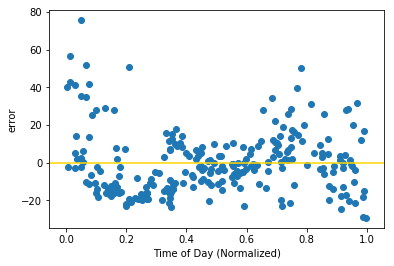

In [19]:
# plotting the residuals
e = y_train - train_predict
plt.scatter(x_train, e)
plt.xlabel("Time of Day (Normalized)")
plt.ylabel("error")
plt.axhline(0, color='gold');

Using the residual plot, comment on whether the assumption of linearity is valid for this data.
<br>
This plot indicates that the assumption of linearity is not valid for this data. We are using a linear model and yet there is still a great variance in the residuals, which implies that our model does not mimic the true model very well at all.

# Part (c): Polynomial Regression

We proceed to higher-order polynomial models for regression:

- By visual inspection, what polynomial degree do you think would provide the best fit for the data?

By inspection, I think a polynomial degree of 3 would provide the best fit for the data. This is because the data points seem to decrease at first, then increase, and finally decrease.

- At the start of this assignment, we had advised you to normalize the time predictor in the training and test sets to a value in [0,1], and noted that this would be helpful in fitting polynomial regression models. Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occurred?

- Fit polynomial regression models of degrees 2, 3, 10, 25 and 50 to the training set, and generate visualizations of the fitted models (in the same figure, plot the predicted value from all models as a function of time). 

- Evaluate the $R^2$ value of the fitted models on both the training and test sets. Does a high training $R^2$ value necessarily indicate a high test $R^2$ value? How do the test $R^2$ values from the different polynomial models compare with the test $R^2$ from simple linear regression in Part (b), and the best test $R^2$ from k-NN regression in Part (a)?

- Generate residual plots for the different polynomial regression models (plot of residuals on training set vs. time). How does the increase in polynomial degree effect the residual plots?

*Hint:* You may use the `PolynomialFeatures` class to include polynomial terms in the regression model.

Had the time predictor not been normalized, what difficulties in implementing polynomial regression may have occured? 
<br>
If the time predictor was not normalized to have x values between 0 and 1, then the model would have to compute y values from x values up to 1440, which would be extremely hard and complex for a computer. 

In [20]:
from sklearn.linear_model import LinearRegression

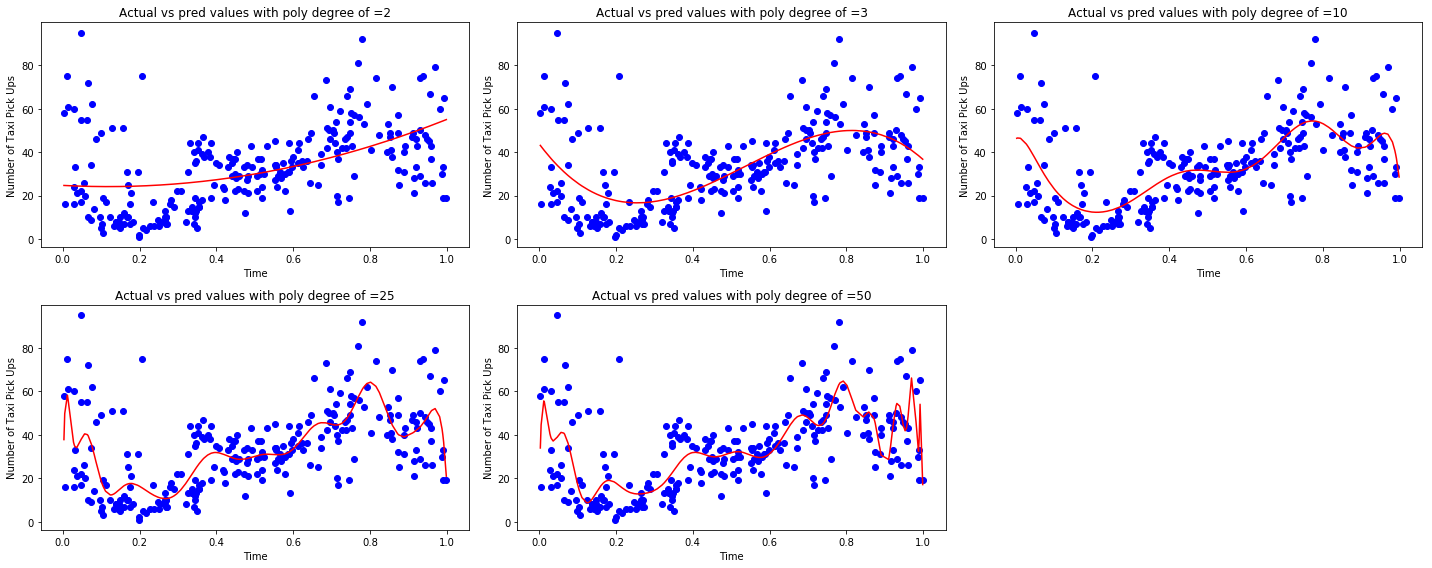

In [21]:
degree = [2, 3, 10, 25, 50]
fig = plt.figure(figsize=(20, 8))
for i, degree in enumerate(degree):
    plt.subplot(2,3,i+1)
    plt.scatter(x_train1, y_train1, color = 'blue', label='Y_Train')
    plt.xlabel("Time")
    plt.ylabel("Number of Taxi Pick Ups")
    plt.title("Actual vs pred values with poly degree of =" + str(degree));
    # generating polynomial values
    poly_terms = PolynomialFeatures(degree=degree, interaction_only=False)
    # fitting data and then transforming it
    x_train_with_poly = poly_terms.fit_transform(x_train1)
    x_test_with_poly = poly_terms.fit_transform(x_test1)
    poly_reg_model = LinearRegression(fit_intercept=False)
    poly_reg_model.fit(x_train_with_poly, y_train1)
    y_pred = poly_reg_model.predict(x_train_with_poly)
    plt.plot(x_train1, y_pred, color='red');

# makes sure that each plot is properly fitted
fig.tight_layout()
plt.show()

In [22]:
# Evaluating R^2 value of the fitted models on both the training and test sets
r_sq_train_poly = []
r_sq_test_poly = []
degree = [2, 3, 10, 25, 50]
for val in degree: 
    # generating polynomial values
    poly_terms = PolynomialFeatures(degree=val, interaction_only=False)
    # fitting data and then transforming it
    x_train_with_poly = poly_terms.fit_transform(x_train1)
    x_test_with_poly = poly_terms.fit_transform(x_test1)
    poly_reg_model = LinearRegression(fit_intercept=False)
    poly_reg_model.fit(x_train_with_poly, y_train1)
    # Using the score method to evaluate model with R^2
    score_train = poly_reg_model.score(x_train_with_poly, y_train1)
    score_test = poly_reg_model.score(x_test_with_poly, y_test1)
    r_sq_train_poly.append(score_train)
    r_sq_test_poly.append(score_test)

print("R_^2 for training set:")
print(r_sq_train_poly)
print("R^2 for test set:")
print(r_sq_test_poly)

R_^2 for training set:
[0.2324332710285808, 0.37483623911770786, 0.42827706862460924, 0.46662629897482777, 0.48023511095898092]
R^2 for test set:
[0.25572414216191597, 0.37858436224816683, 0.4020078006956444, 0.39394016871464282, 0.32148614117354279]


Does a high training R^2 value necessarily indicate a high test R^2 value? How do the test R^2 values from the different polynomial models compare with the test R^2 from simple linear regression in Part B) and the best R^2 from KNN regression in part A)? 
<br>
A high training R^2 value does not necessarily indicate a high test R^2 value because there is always the danger of overfitting, meaning that the model we produce will be unnecessarily complex that it will represent very well the training data rather than the testing data. 
<br>
Out of all three regression types, the KNN regression performed better when k equaled 10, achieving a test R^2 equal to approximately 0.41. The polynomial regression was quiet similar with an R^2 of 0.4 when a polynomial of degree 10 was used. While the KNN regression had the best result (closer to 1), the polynomial regression had a less volatile test R^2 for the different polynomial models compared to the different KNN models. The simple linear regression model performed the worst with a test R^2 equal to approximately 0.25.  

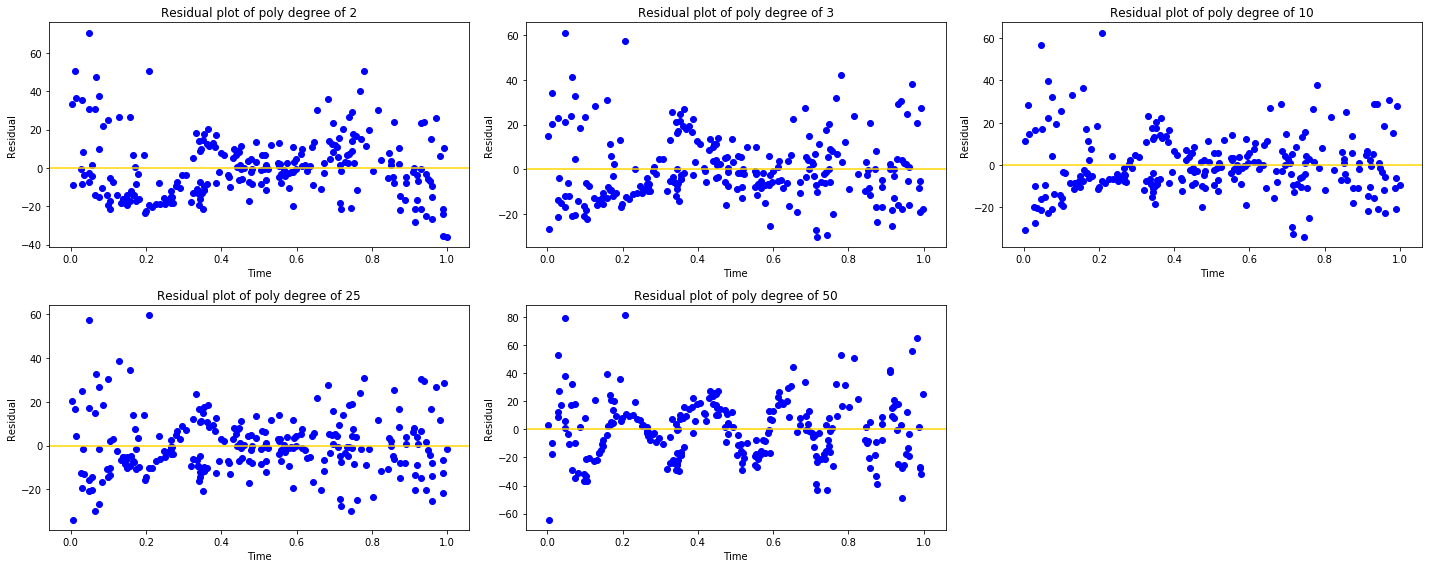

In [23]:
# residual plots for the different polynomial regression models (plot of residuals on training set vs time)
degree = [2, 3, 10, 25, 50]
fig = plt.figure(figsize=(20, 8))
for i, degree in enumerate(degree):
    plt.subplot(2,3,i+1)
    plt.xlabel("Time")
    plt.ylabel("Residual")
    plt.title("Residual plot of poly degree of " + str(degree));
    # generating polynomial values
    poly_terms = PolynomialFeatures(degree=degree, interaction_only=False)
    # fitting data and then transforming it
    x_train_with_poly = poly_terms.fit_transform(x_train1)
    x_test_with_poly = poly_terms.fit_transform(x_test1)
    poly_reg_model = LinearRegression(fit_intercept=True)
    poly_reg_model.fit(x_train_with_poly, y_train1)
    y_pred = poly_reg_model.predict(x_train_with_poly)
    # calculating the residual
    error = y_train1 - y_pred
    plt.scatter(x_train1, error, color='blue')
    # line when y=0
    plt.axhline(y=0, color='gold', label = 'zero error');
    
fig.tight_layout()
plt.show()

How does the increase in polynomial degree effect the residual plots?  
<br> 
If our model is effective, the data in the residual plot should be centered around zero and evenly distributed above and below this axis. Based on the graphs above, we can see that when the degree is small, like 2, 3 and even 10, the residual plot displays a pattern among the data points, implying that our model is not effective. Instead, when the k increases to, for example, 25, we can see that overall, the data points seem to be evenly sparced above and below the y=0 line. Given that there is no pattern among the data points in the residual plot, this could thus be an accurate model. Once the degree reaches 50 though, we see a strong pattern among the data points, and thus an ineffective model.

# Part (d): Summarize Results
In a brief paragraph (8 or fewer sentences), summarize which of the models seen above you would choose to predict the number of taxi cab pick-ups at any specific time of day.  Be sure to explain your choice. Interpret the model you choose, including which predictors are significant and provide and interpret the CIs for their coefficients (if you choose a regression model). How well does you model predict the number of taxi cab pick-ups?  How would you improve this model even further?  Feel free to refer to visual(s) above or provide a new one to make your case.
<br>
<br>
In order to decide which of the models is the most accurate to predict the number of taxi bac pick-ups at any specific time of day, I am going to interpret the R^2 values we calculated and the residual plots we produced. The best model would need to have the R^2 value as close to 1 as possible, as it would explain all the variability of the response variable. The R^2 value though cannot determine whether the predictions are biased, which is why we would need to examine the residual plots as well, and if a model is accurate, there should be no relationship between the data points of the residual.  
<br>
I think the K-NN regression model with k=10 is the best model that predicts the number of taxi cab pick-ups at any specific time of day as it has the highest test set R^2 value of 0.42. Futhermore, as seen from the figure below, the data points in the residual plot seem to be relatively evenly distributed above and below the y=0 line, showing no apparent relationship. Because of this, I am confident that the model is accurate to predict the number of taxi cab pick-ups. 
<br>
In order to improve this model further, I would likely try to find the exact k value where the test set R^2 is the closest to 1. In part a), the plot of the test R^2 peaks at some point between when k is 0 and 25, thus I would take the derivative of the line to find the exact value for k.


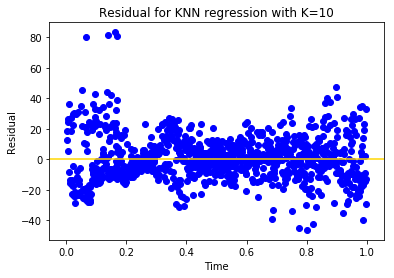

In [31]:
# residual plot for KNN regression with K=10
KNR = KNeighborsRegressor(n_neighbors = 10)
# fits the model using x_train1 as training data and y_train1 as target values
y_pred = KNR.fit(x_train1, y_train1).predict(x_test1)
error = y_test1 - y_pred
plt.scatter(x_test1, error, color='blue')
# line when y=0
plt.axhline(y=0, color='gold', label = 'zero error')
plt.xlabel("Time")
plt.ylabel("Residual")
plt.title("Residual for KNN regression with K=10");

---- 


# APCOMP209a - Homework Question

Read Sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, we have a number of cleaned images of people's faces. The model leverages the concept that "patterns from a single-object class lie on a linear subspace" and the fact that linear regression can be thought of as an orthogonal projection of the response vector (Y) onto the subspace spanned by the columns of the predictor matrix (X).

### Question 1
Consider a space in $\mathbb{R}^5$, with two subspaces $S_0 \subset \mathbb{R}^5$ and $S_1 \subset \mathbb{R}^5$. For simplicity, let us consider the case where the subspace $S_0$ is spanned by the vectors $v_{00} = [1,0,0,0,0]^T$, $v_{01} =[0,1,0,0,0]^T$ and the subspace $S_1$ is spanned by the vectors $v_{10} = [0,0,0,1,0]^T$ and $v_{11} = [0,0,0,0,1]^T$. 

Now let us assume that we have a dataset that consists of labeled vectors in subspaces $S_0$ and $S_1$ respectively. Our task here is to use the data in the training dataset to classify an unknown vector into either $S_0$ or $S_1$.

Let us consider the case where we construct a predictive matrix $\mathbf{X}$ from the 'training' data for which we know the labels (note: is not meant to match $S_0$ and $S_1$ above).

```
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
```

(Briefly notice that the training data probably doesn't consist of vectors that are orthonormal in spanning $S_0$ or $S_1$).

And we have an unknown vector, for which we want clasify as either a noisy example of a vector in either $S_0$ or $S_1$: ```y_0 = np.array([2,10,1,0,0])```.

In [24]:
# starter code
dataset = np.array([
            [1,0,0,0,0],
            [1,1,0,0,0],
            [0,0,0,1,1],
            [0,0,0,1,0],
            ])
labels = np.array([0,0,1,1])
y_0 = np.array([2,10,1,0,0])

#### Question 1a
Recall the solution for the Least Squares problem and the 'hat' matrix $\mathbf{H}$. Consider the case when $Y$ lies in the same subspace as the columns of $\mathbf{X}$. In this case, how accurate should the prediction of $\hat{Y}$ be?

#### Question 1b
Given the projection of $Y$ onto the space spanned by the columns of the X matrix. We can analyse the significance of the different predictor vectors (i.e. the building blocks that are used to reconstrct the $\hat{Y}$ vector). Discuss how this may help one when analysing a classification decision by the model.

#### Question 1c
As discussed in the linked paper, we have data that has vectors that are classified into one subspace or another (our training dataset). We can use the projection interpretation of linear regression to make a classification decision of a new (unseen) vector into either $S_0$ or $S_1$. In other words, construct X matrices from the known vectors, and project the unknown vector onto the subspaces spanned by the various X matrices using the "hat" interpretation of linear regression. To do classification, we can calculate the minimum euclidean distance ($L_2$ norm) between the original vector and the projection. Use this method to classify ```y_0``` as belonging to either $S_0$ or $S_1$.

**Feel free to run this same example on the face data presented in the paper - you will be doing this for next week's homework regardless**

#### Question 1d (unrelated to the parts above)

Explicitly derive the relationship between the F-statistic (from the usual F test) and the $R^2$ measure in multiple linear regression (i.e. write the F-statistic of a multiple linear regression model in terms of the $R^2$ of the same model).